In [1]:
#Importing the required packages/libraries
import pandas as pd
import numpy as np
import nltk

# For visualizations
import matplotlib.pyplot as plt

import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport

import re
# For handling string
import string
# For performing mathematical operations
import math

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import scipy


from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
# Importing dataset
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Individual Assignment/sentiment_train.csv') 
test_df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Big Data Analytics/Individual Assignment/sentiment_test.csv')

print("Shape of data=>",df.shape)
print("Shape of data=>",test_df.shape)
df.head()
test_df.head()

Shape of data=> (2202, 2)
Shape of data=> (546, 2)


,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [3]:
#Check if data is imbalanced
df['Polarity'].value_counts()
test_df['Polarity'].value_counts()

0    1113
1    1089
Name: Polarity, dtype: int64

1    297
0    249
Name: Polarity, dtype: int64

In [4]:
test_df.head()

,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [5]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i])
    print()
    i=i+1
    

Sentence Number  0

Wow... Loved this place. 1

Sentence Number  1

Crust is not good. 0

Sentence Number  2

Not tasty and the texture was just nasty. 0

Sentence Number  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. 1

Sentence Number  4

The selection on the menu was great and so were the prices. 1

Sentence Number  5

Now I am getting angry and I want my damn pho. 0

Sentence Number  6

Honeslty it didn't taste THAT fresh.) 0

Sentence Number  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. 0

Sentence Number  8

The fries were great too. 1

Sentence Number  9

A great touch. 1

Sentence Number  10

Service was very prompt. 1

Sentence Number  11

Would not go back. 0

Sentence Number  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. 0

Sentence Number  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm! 1

In [6]:
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(test_df['Sentence'][i],test_df['Polarity'][i])
    print()
    i=i+1

Sentence Number  0

A good commentary of today's love and undoubtedly a film worth seeing.   1

Sentence Number  1

For people who are first timers in film making, I think they did an excellent job!!   1

Sentence Number  2

It was very popular when I was in the cinema, a good house and very good reactions and plenty of laughs.   1

Sentence Number  3

It's a feel-good film and that's how I felt when I came out of the cinema!   1

Sentence Number  4

It has northern humour and positive about the community it represents.   1

Sentence Number  5

I rather enjoyed it.   1

Sentence Number  6

I liked it.   1

Sentence Number  7

I couldn't take them seriously.   0

Sentence Number  8

It really created a unique feeling though.   1

Sentence Number  9

Vivian Schilling did an excellent job with the script.   1

Sentence Number  10

A world better than 95% of the garbage in the theatres today.   1

Sentence Number  11

Her role was played well.   1

Sentence Number  12

Not too screamy not 

In [7]:
# Remove ,,, from entries in name column
df['Sentence'] = df['Sentence'].str.replace(r'\,,,','')
df['Sentence'].unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       "Unfortunately, 'Cover Girl' is an example of how Hollywood used to exploit women for financial gain.  ",
       'Non-linear narration thus many flashbacks and every part are articulated quite well.  ',
       'The good cinematography also makes her and Monica Bellucci look very beautiful.  '],
      dtype=object)

In [8]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Sentence ",i)
    print()
    print(df['Sentence'][i])
    print()
    i=i+1
    


Sentence  0

Wow... Loved this place.

Sentence  1

Crust is not good.

Sentence  2

Not tasty and the texture was just nasty.

Sentence  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

Sentence  4

The selection on the menu was great and so were the prices.

Sentence  5

Now I am getting angry and I want my damn pho.

Sentence  6

Honeslty it didn't taste THAT fresh.)

Sentence  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

Sentence  8

The fries were great too.

Sentence  9

A great touch.

Sentence  10

Service was very prompt.

Sentence  11

Would not go back.

Sentence  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

Sentence  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!

Sentence  14

I was disgusted because I was pretty sure that was human hair.

Sentence  15

I was shocked because no signs i

In [9]:
#Remove contractions from sentences
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the sentences
df['Sentence']=df['Sentence'].apply(lambda x:expand_contractions(x))

In [10]:
#Check first 30 reviews 
i=0
while i<50:
    print ("Sentence ",i)
    print()
    print(df['Sentence'][i])
    print()
    i=i+1
    

Sentence  0

Wow... Loved this place.

Sentence  1

Crust is not good.

Sentence  2

Not tasty and the texture was just nasty.

Sentence  3

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

Sentence  4

The selection on the menu was great and so were the prices.

Sentence  5

Now I am getting angry and I want my damn pho.

Sentence  6

Honeslty it did not taste THAT fresh.)

Sentence  7

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

Sentence  8

The fries were great too.

Sentence  9

A great touch.

Sentence  10

Service was very prompt.

Sentence  11

Would not go back.

Sentence  12

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

Sentence  13

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!

Sentence  14

I was disgusted because I was pretty sure that was human hair.

Sentence  15

I was shocked because no signs 

In [11]:
#Convert sentences into Lowercase 
df['Sentence']=df['Sentence'].str.lower()


In [12]:
#Remove digits and words containing digits  from sentences
df['Sentence']=df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [13]:
#Remove Punctuations from sentences
df['Sentence']=df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [14]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i])
    print()
    i=i+1

Sentence Number  0

wow loved this place 1

Sentence Number  1

crust is not good 0

Sentence Number  2

not tasty and the texture was just nasty 0

Sentence Number  3

stopped by during the late may bank holiday off rick steve recommendation and loved it 1

Sentence Number  4

the selection on the menu was great and so were the prices 1

Sentence Number  5

now i am getting angry and i want my damn pho 0

Sentence Number  6

honeslty it did not taste that fresh 0

Sentence Number  7

the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer 0

Sentence Number  8

the fries were great too 1

Sentence Number  9

a great touch 1

Sentence Number  10

service was very prompt 1

Sentence Number  11

would not go back 0

Sentence Number  12

the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced 0

Sentence Number  13

i tried the cape cod ravoli chickenwith cranberrymmmm 1

Sentence Number  14


In [15]:
#Commonly occuring words from sentences
freq = pd.Series(' '.join(df['Sentence']).split()).value_counts()[:10]
freq

the     1412
i        846
and      846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

In [16]:
#removal of commonly occuring irrelevant words from sentences
freq = list(freq)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Sentence'].head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

In [17]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)


                                               Sentence  Polarity
0                                       wow loved place         1
1                                            crust good         0
2                                   tasty texture nasty         0
3     stopped late may bank holiday rick steve recom...         1
4                           selection menu great prices         1
...                                                 ...       ...
2197       almost songs cover girl oldfashioned tuneful         0
2198  annoying thing cover girl way rita hayworth pu...         0
2199  unfortunately cover girl example hollywood use...         0
2200  nonlinear narration thus many flashbacks every...         1
2201  good cinematography also makes monica bellucci...         1

[2202 rows x 2 columns]


In [18]:
#Lemmatization

from textblob import Word
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Sentence'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: Sentence, dtype: object

In [19]:
#Sentiment Analysis of sentences(Calculating polarity score)
from textblob import TextBlob
df['new_polarity']=df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [20]:
#Check first 30 reviews after cleaning 
i=0
while i<50:
    print ("Sentence Number ",i)
    print()
    print(df['Sentence'][i],df['Polarity'][i],df['new_polarity'][i])
    print()
    i=i+1

Sentence Number  0

wow loved place 1 0.39999999999999997

Sentence Number  1

crust good 0 0.7

Sentence Number  2

tasty texture nasty 0 -1.0

Sentence Number  3

stopped late may bank holiday rick steve recommendation loved 1 0.19999999999999998

Sentence Number  4

selection menu great price 1 0.8

Sentence Number  5

getting angry want damn pho 0 -0.5

Sentence Number  6

honeslty taste fresh 0 0.3

Sentence Number  7

potato like rubber could tell made ahead time kept warmer 0 0.0

Sentence Number  8

fry great 1 0.8

Sentence Number  9

great touch 1 0.8

Sentence Number  10

service prompt 1 0.0

Sentence Number  11

would go back 0 0.0

Sentence Number  12

cashier care ever say still ended wayyy overpriced 0 0.0

Sentence Number  13

tried cape cod ravoli chickenwith cranberrymmmm 1 0.0

Sentence Number  14

disgusted pretty sure human hair 0 -0.0625

Sentence Number  15

shocked sign indicate cash 0 -0.7

Sentence Number  16

highly recommended 1 0.16

Sentence Number  17

w

In [21]:
#Word Count of sentences

df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split(" ")))
df[['Sentence','word_count']].head()

,Sentence,word_count
0,wow loved place,3
1,crust good,2
2,tasty texture nasty,3
3,stopped late may bank holiday rick steve recom...,9
4,selection menu great price,4


In [22]:
#Feature Engineering

df['wow_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('wow')]))

df['loved_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('loved')]))

df['great_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('great')]))

df['highly_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('highly')]))

df['amazing_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('amazing')]))

df['like_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('like')]))

df['excellent_count'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('excellent')]))


df.head()


,Sentence,Polarity,new_polarity,word_count,wow_count,loved_count,great_count,highly_count,amazing_count,like_count,excellent_count
0,wow loved place,1,0.4,3,1,1,0,0,0,0,0
1,crust good,0,0.7,2,0,0,0,0,0,0,0
2,tasty texture nasty,0,-1.0,3,0,0,0,0,0,0,0
3,stopped late may bank holiday rick steve recom...,1,0.2,9,0,1,0,0,0,0,0
4,selection menu great price,1,0.8,4,0,0,1,0,0,0,0


In [50]:
#TFID Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500, lowercase=True, stop_words = 'english', ngram_range=(1, 4), min_df =0.01,max_df=0.4)
#fit the vectorizers to the data.
features = vectorizer.fit_transform(df['Sentence'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())



In [51]:
#Checking features
pandaframe

,amazing,bad,battery,best,better,came,case,day,definitely,delicious,...,thing,think,time,use,used,waste,way,work,worst,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695473,0.0,0.0,0.0,0.0,0.0,0.718552,0.0,0.0,0.0
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [77]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=300, 
                                      learning_method='batch', 
                                      random_state=42,
                                      n_jobs=-1,
                                      verbose=0)
lda_output = lda_model.fit(pandaframe)

# Log Likelyhood: Higher the betterlda
ll = lda_model.score(pandaframe)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(pandaframe)

In [78]:
# Theta = document-topic matrix
# Beta = components_ = topic-term matrix
theta = pd.DataFrame(lda_model.transform(pandaframe))
beta = pd.DataFrame(lda_model.components_)

In [79]:
theta

,0,1,2,3,4,5,6,7,8,9
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000
1,0.050000,0.050000,0.050000,0.050000,0.050000,0.050003,0.050000,0.050000,0.549997,0.050000
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
4,0.041706,0.041706,0.041706,0.041706,0.041706,0.041706,0.041706,0.041711,0.378060,0.288286
...,...,...,...,...,...,...,...,...,...,...
2197,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
2198,0.041425,0.041425,0.041425,0.041425,0.041425,0.041425,0.041425,0.041425,0.041425,0.627179
2199,0.050015,0.050000,0.050000,0.050000,0.549976,0.050000,0.050009,0.050000,0.050000,0.050000
2200,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [80]:

# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [81]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary.head(25)

,TopicID,Support50,Support10,Weight,Terms
0,0,64,192,198.645020,headset better excellent got amazing right
1,1,46,131,177.468290,like think poor quality service time
2,2,77,156,192.556980,disappointed pretty delicious came new film
3,3,75,246,211.898067,time really product make ear good
4,4,107,236,221.599237,food bad case definitely problem money
5,5,94,260,223.997175,place use quality sound restaurant year
6,6,140,331,250.861426,phone battery recommend minute going happy
7,7,78,208,208.295040,work movie say look little great
8,8,183,418,287.599030,good service love nice price worst
9,9,100,277,229.079734,great best thing way friendly food


In [82]:
#Concating features and vetorized features for ML
df1=df[['new_polarity','word_count','wow_count','loved_count','great_count','highly_count','amazing_count','Polarity']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True),theta.reset_index(drop=True)], axis=1)

In [83]:
#Labels and text features were separated 

X = df2.drop(["Polarity"], axis=1)

y = df2["Polarity"]


In [84]:
#Text Preprocessing on Test Dataset


# Remove ,,, from entries in name column
test_df['Sentence'] = test_df['Sentence'].str.replace(r'\,,,','')
test_df['Sentence'].unique()

#Remove contractions from sentences
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x:expand_contractions(x))

#Converting sentences to Lowercase 
test_df['Sentence']=test_df['Sentence'].str.lower()

#Remove digits and words containing digits from sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations from sentences
test_df['Sentence']=test_df['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words from sentences
freq_test = pd.Series(' '.join(test_df['Sentence']).split()).value_counts()[:10]
freq_test

#removal of commonly occuring irrelevant words from sentences
freq_test = list(freq_test)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_test))
test_df['Sentence'].head()


# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test_df)

#Lemmatization

from textblob import Word
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_df['Sentence'].head()

#Sentiment Analysis 
from textblob import TextBlob
test_df['new_polarity']=test_df['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Word Count
test_df['word_count'] = test_df['Sentence'].apply(lambda x: len(str(x).split(" ")))
test_df[['Sentence','word_count']].head()


#Feature Engineering

test_df['wow_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('wow')]))

test_df['loved_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('loved')]))

test_df['great_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('great')]))

test_df['highly_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('highly')]))

test_df['amazing_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('amazing')]))

test_df['like_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('like')]))

test_df['excellent_count'] = test_df['Sentence'].apply(lambda x: len([x for x in x.split() if x.startswith('excellent')]))

test_df.head()


array(['good commentary today love undoubtedly film worth seeing',
       'people first timer film making think excellent job',
       'popular cinema good house good reaction plenty laugh',
       'feelgood film felt came cinema',
       'northern humour positive community represents', 'rather enjoyed',
       'liked', 'could take seriously',
       'really created unique feeling though',
       'vivian schilling excellent job script',
       'world better garbage theatre today', 'role played well',
       'screamy masculine right', 'camera really like movie',
       'would casted role ready script',
       'european movie nice throwback time student experience living abroad interacting nationality although circumstance slightly different',
       'fan movie sucked really bad', 'even worse ticker', 'movie bad',
       'like building used couple location maybe poor hummh', 'blew',
       'movie excellentangel beautiful scamp adorablehis little yelp he scaredand funniest part whenscamp 

film         124
movie        119
one           52
bad           47
like          35
character     34
time          33
good          33
acting        30
great         26
dtype: int64

0    good commentary today love undoubtedly film worth seeing
1          people first timer film making think excellent job
2        popular cinema good house good reaction plenty laugh
3                              feelgood film felt came cinema
4               northern humour positive community represents
Name: Sentence, dtype: object

                                                              Sentence  ...  excellent_count
0             good commentary today love undoubtedly film worth seeing  ...                0
1                   people first timer film making think excellent job  ...                1
2                 popular cinema good house good reaction plenty laugh  ...                0
3                                       feelgood film felt came cinema  ...                0
4                        northern humour positive community represents  ...                0
..                                                                 ...  ...              ...
541                      got bored watching jessice lange take clothes  ...                0
542  unfortunately virtue film production work lost regrettable script  ...                0
543                                                  word embarrassing  ...                0
544                                                  exceptionally bad

0    good commentary today love undoubtedly film worth seeing
1          people first timer film making think excellent job
2        popular cinema good house good reaction plenty laugh
3                              feelgood film felt came cinema
4               northern humour positive community represents
Name: Sentence, dtype: object

,Sentence,word_count
0,good commentary today love undoubtedly film worth seeing,8
1,people first timer film making think excellent job,8
2,popular cinema good house good reaction plenty laugh,8
3,feelgood film felt came cinema,5
4,northern humour positive community represents,5


,Sentence,Polarity,new_polarity,word_count,wow_count,loved_count,great_count,highly_count,amazing_count,like_count,excellent_count
0,good commentary today love undoubtedly film worth seeing,1,0.500000,8,0,0,0,0,0,0,0
1,people first timer film making think excellent job,1,0.625000,8,0,0,0,0,0,0,1
2,popular cinema good house good reaction plenty laugh,1,0.575000,8,0,0,0,0,0,0,0
3,feelgood film felt came cinema,1,0.000000,5,0,0,0,0,0,0,0
4,northern humour positive community represents,1,0.227273,5,0,0,0,0,0,0,0


In [85]:
#Test Dataset Text Vectorizer  

#fit the vectorizers to the test data

features1 = vectorizer.transform(test_df['Sentence'])
pandaframe1 = pd.DataFrame(features1.toarray(), columns=vectorizer.get_feature_names())

theta_test = pd.DataFrame(lda_model.transform(pandaframe1))
beta_test = pd.DataFrame(lda_model.components_)

df4=test_df[['new_polarity','word_count','wow_count','loved_count','great_count','highly_count','amazing_count','Polarity']]

df5= pd.concat([pandaframe1.reset_index(drop=True), df4.reset_index(drop=True),theta_test.reset_index(drop=True)], axis=1)

In [86]:
theta_test

,0,1,2,3,4,5,6,7,8,9
0,0.036972,0.036972,0.288314,0.036972,0.036972,0.036973,0.036972,0.036972,0.415908,0.036972
1,0.238510,0.244920,0.260202,0.036624,0.036624,0.036624,0.036624,0.036624,0.036624,0.036624
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.050003,0.050000,0.050000,0.549997,0.050000
3,0.041424,0.041424,0.627186,0.041424,0.041424,0.041424,0.041424,0.041424,0.041424,0.041424
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...
541,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
542,0.041661,0.041661,0.374523,0.041661,0.041661,0.041661,0.041661,0.292190,0.041661,0.041661
543,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
544,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000


In [87]:

# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

# Build Topic Summary
feature_names_test = vectorizer.get_feature_names()
weight_test = theta_test.sum(axis=0)
support50_test = (theta_test > 0.5).sum(axis=0)
support10_test = (theta_test > 0.1).sum(axis=0)
termss_test = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms_test = " ".join([feature_names_test[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss_test.append(terms_test)
topic_summary_test = pd.DataFrame({'TopicID': range(0, len(termss_test)), "Support50": support50_test, "Support10": support10_test, "Weight": weight_test, "Terms": termss_test})

In [88]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary.head(25)
topic_summary_test.head(25)

,TopicID,Support50,Support10,Weight,Terms
0,0,64,192,198.645020,headset better excellent got amazing right
1,1,46,131,177.468290,like think poor quality service time
2,2,77,156,192.556980,disappointed pretty delicious came new film
3,3,75,246,211.898067,time really product make ear good
4,4,107,236,221.599237,food bad case definitely problem money
5,5,94,260,223.997175,place use quality sound restaurant year
6,6,140,331,250.861426,phone battery recommend minute going happy
7,7,78,208,208.295040,work movie say look little great
8,8,183,418,287.599030,good service love nice price worst
9,9,100,277,229.079734,great best thing way friendly food


,TopicID,Support50,Support10,Weight,Terms
0,0,13,34,46.051526,headset better excellent got amazing right
1,1,9,36,45.205483,like think poor quality service time
2,2,49,120,78.982069,disappointed pretty delicious came new film
3,3,15,51,50.431303,time really product make ear good
4,4,21,58,54.554502,food bad case definitely problem money
5,5,6,26,42.413713,place use quality sound restaurant year
6,6,5,19,40.336102,phone battery recommend minute going happy
7,7,58,132,83.287465,work movie say look little great
8,8,21,54,52.940491,good service love nice price worst
9,9,23,50,51.797346,great best thing way friendly food


In [89]:
#Separating text, other features and label features
X_test = df5.drop(["Polarity"], axis=1)

y_test = df5["Polarity"]

In [90]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=50000)
log_reg.fit(X, y)

LogisticRegression(max_iter=50000)

[[220  29]
 [103 194]]


(220, 29, 103, 194)

AUC Score = 0.768

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       249
           1       0.87      0.65      0.75       297

    accuracy                           0.76       546
   macro avg       0.78      0.77      0.76       546
weighted avg       0.78      0.76      0.76       546



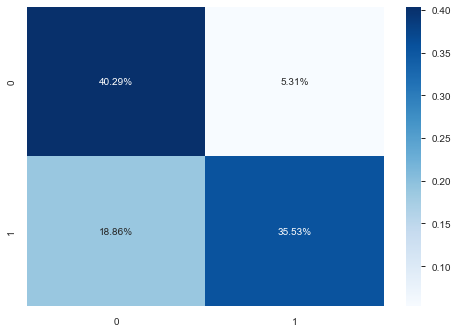

In [92]:
#Confusion Matrix for Logistic Regression Classifier without hyperparamter tuning

import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Predicting performance of hypertuned Logistic Regression model

pred_test = log_reg.predict(X_test)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test)))
print()
print(classification_report(y_test, pred_test))

In [75]:
from sklearn.model_selection import GridSearchCV

#Logistic Regression classifier with hyperparameter tuning 

parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga','lbfgs'],'max_iter':[50000]}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=-1, scoring='f1',verbose=10)

# Fit on data

%time LogReg_grid.fit(X, y)

LogReg_grid.best_params_ # printing out best parameters

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1040s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1751s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4304s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1210s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0480s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too slow (22.5070s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:

Wall time: 14min 21s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [50000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs']},
             scoring='f1', verbose=10)

{'C': 0.01,
 'dual': False,
 'fit_intercept': False,
 'max_iter': 50000,
 'penalty': 'l1',
 'solver': 'saga'}

[[210  39]
 [111 186]]


(210, 39, 111, 186)

AUC Score = 0.735

              precision    recall  f1-score   support

           0       0.65      0.84      0.74       249
           1       0.83      0.63      0.71       297

    accuracy                           0.73       546
   macro avg       0.74      0.73      0.72       546
weighted avg       0.75      0.73      0.72       546



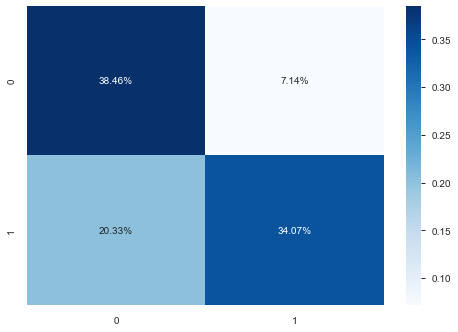

In [76]:
# Predicting performance of hypertuned Logistic Regression model

pred_test_log_grid = LogReg_grid.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test_log_grid)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test_log_grid).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test_log_grid)))
print()
print(classification_report(y_test, pred_test_log_grid))

In [62]:
#Setting up the Random Forest Classifier Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [63]:
# Use the RF GridSearch to search for best hyperparameters
from sklearn.ensemble import RandomForestClassifier as RFC

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='f1',n_jobs=-1)

# Fit the random search model
rf.fit(X, y)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='f1', verbose=10)

[[208  41]
 [ 93 204]]


(208, 41, 93, 204)

AUC Score = 0.761

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       249
           1       0.83      0.69      0.75       297

    accuracy                           0.75       546
   macro avg       0.76      0.76      0.75       546
weighted avg       0.77      0.75      0.75       546



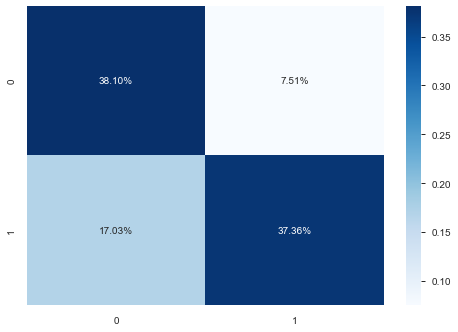

In [64]:
# Predicting performance of hypertuned Random Forest Classifier

pred_test_rf = rf.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test_rf)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test_rf).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test_rf)))
print()
print(classification_report(y_test, pred_test_rf))

In [65]:
# Defining SVM hyperparameter tuning
from sklearn.svm import SVC
#Hypereparameter Grid
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

#Defininf the SVM Model 
svm_model=SVC(random_state=42)  

#Defining the SVM grid search CV model 
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,n_jobs=-1,scoring='f1')
  
# fitting the model for grid search
svm.fit(X,y)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 90, 100, 120],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1', verbose=10)

[[215  34]
 [112 185]]


(215, 34, 112, 185)

AUC Score = 0.743

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       249
           1       0.84      0.62      0.72       297

    accuracy                           0.73       546
   macro avg       0.75      0.74      0.73       546
weighted avg       0.76      0.73      0.73       546



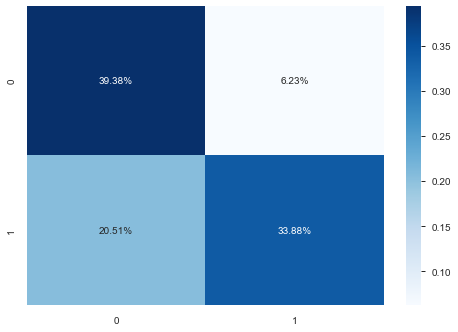

In [66]:
# Predicting performance of hypertuned Support Vector Classifier

pred_test_svm = svm.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test_svm)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test_svm).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test_svm)))
print()
print(classification_report(y_test, pred_test_svm))

In [ ]:
#xgBoost

import xgboost as xgb

boost_grid = {'nthread': [4], 
              'objective': ['binary:logistic'],
              'learning_rate':[0.02,0.03,0.05,0.1],
              'max_depth': [3,5,10],
              'subsample':[0.5,0.8,1],
              'colsample_bytree':[0.5,0.7,1],
              'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 50, num = 10)],
        } 
xgb_model=xgb.XGBClassifier(random_state=42)  


xgb = GridSearchCV(xgb_model, boost_grid, refit = True, verbose = 3,cv=3,scoring='f1')
  
# fitting the model for grid search
xgb.fit(X, y)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.729, total=   1.7s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.777, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.700, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.771, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.788, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.737,

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.689, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.737, tota

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.772, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.771, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.717, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.694, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.757, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.782, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.702,

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.769, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.778, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.725, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.769, to

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.767, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.766, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.701, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.768, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.692, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.757, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.769, 

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.764, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.772, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.704, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.771, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.776, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.695, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.737, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.774, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.721, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.768, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.789, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.734, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.725, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.737, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.747, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.768, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.691, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.771, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.780, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.713, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.755, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.770, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.726, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.724, 

[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.763, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.774, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.693, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 

[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.692, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.773, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.781, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.736, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.739, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.782, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.781

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.733, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.699, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.780, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.781, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.725, total=   0.

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.730, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.763, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.772, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.775, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.708, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.774, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.758, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.767, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.709, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_b

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.703, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.763, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.780, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, 

[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.711, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.767, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.791, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.731, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.0s
[CV]

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.743, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.739, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.789, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.733,

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.727, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.753, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.767, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.687, to

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.733, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.784, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.792,

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.723, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total= 

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.737, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.755, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.681, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.710, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.767, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.789, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.704, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.755, total=   0.2s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.771, 

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.742, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score=0.788, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.784, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.738, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, to

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.732, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.780, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.792, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.740, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, to

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.715, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.771, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, s

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.714, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.777, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.783, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.785, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.732, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.770, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.02, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.740, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score=0.788, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=1, score=0.739, tota

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.5, score=0.787

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.732, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.733, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.791, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.792, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.740, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.792, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.740, tota

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.765, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.715, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.769, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.781, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.712, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score=0.771, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.774, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.785, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.728, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.03, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, sc

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.737, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.741, total=   0.

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.740, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.784, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.741, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=1, score=0.7

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.728, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.752, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.774, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.730, total=   0.

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.744, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.782, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.788, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.736, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.790, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.767, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.722, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0.765, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=10, nthread=4, objective=binary:logistic, subsample=0.5, score=0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.770, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.722, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.722, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.771, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8, score=0.775, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.8

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.734, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.789, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.741, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=25, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.735, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.732, t

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.775, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.714, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8, score=0.748, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.791, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.790, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=1, score=0.793, tot

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.744, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=40, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.748, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.769, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.703, t

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.718, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.766, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.779, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.726, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.760, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.779, 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.762, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.780, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.726, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=  

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.747, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.782, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.740, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.787, total=   0.1s


[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=5, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learn

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.740, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.783, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.8, score=0.785, total=

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.739, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.743, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.789, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.776, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.741, total=   0.3s
[CV]

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.743, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.781, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.782, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=20, nthread=4, objective=binary:logistic, subsample=0.5, score=0.735, t

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.789, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.725, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.778, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.8, score=0.780,

[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.778, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.779, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.733, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.02, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=1, score=0.764, tot

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.743, total=   0.1s
[CV]

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.787, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.746, total=  

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.743, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.789, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=3, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.741, total=

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.783, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.741, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.789, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=1, score=0.776, total=   0.1s


[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.776, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.735, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.789, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=35, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.2

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.789, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.791, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.740, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.8, score=0.790, total=

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.733, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.779, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.784, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.739,

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.783, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.730, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.763, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.771, total= 

[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.768, total=   0.5s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.770, total=   0.5s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.734, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.03, max_depth=10, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.776, total=   

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=1, score=0.745, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.744, total=  

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.5, score=0.745, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.788, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.786, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.742, total=

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.8, score=0.740, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.2s
[CV]

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.782, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.736, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.794, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.790, total=

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.790, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.739, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.792, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.782, total=   0.2s


[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.790, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.740, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.2s
[C

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.777, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.776, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.735, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.770,

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.5, score=0.731, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.775, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.780, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.737,

[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.8, score=0.782, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.8, score=0.723, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.765, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.776, total= 

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=10, nthread=4, objective=binary:logistic, subsample=1, score=0.743, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.781, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.786, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.740, total=   0.1s
[

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.5, score=0.741, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.787, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.738, total=   0.1s

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=0.8, score=0.737, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.788, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.786, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.738, total=   0.2s
[CV] colsam

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=10, nthread=4, objective=binary:logistic, subsample=1, score=0.742, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.784, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.781, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.732, total=   0.1s
[

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.789, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.792, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=0.8, score=0.729, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=30, nthread=4, objective=binary:logistic, subsample=1, score=0.789, total=   0.2s
[CV

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.781, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.785, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=45, nthread=4, objective=binary:logistic, subsample=1, score=0.739, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=50, nthread=4, objective=binary:logistic, subsample=0.5, score=0.785, total=   0.2s
[CV] cols

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.783, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.780, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.5, score=0.734, total=   0.1s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=15, nthread=4, objective=binary:logistic, subsample=0.8, score=0.770, total=

In [ ]:
# Predicting performance of hypertuned xgBoost Model

pred_test_xgb = xgb.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test_xgb)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test_xgb).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test_xgb)))
print()
print(classification_report(y_test, pred_test_xgb))

In [70]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dt = DecisionTreeClassifier()
dtcv = GridSearchCV(dt, param_grid, cv=10,scoring="f1",verbose=10)

dtcv.fit(X,y)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.714, total=   0.5s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.721, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.730, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.657, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.731, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.755, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.741, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.629, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.709, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.596, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.720, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.725, total=   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.756, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.663, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_sampl

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.617, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.734, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.673, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.770, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_sampl

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.798, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.786, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.732, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, 

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.784, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.798, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.793, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.828, total=   0

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.779, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.784, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.798, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.791, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.774, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.742, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.794, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.778, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.804, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.749, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.804, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.728, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.726, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.787, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.744, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.793, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.752, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.733, total=   0.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.804, t

[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.767, total=   0.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.777, total=   0.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.755, total=   0.1s
[CV] criterion

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.794, total=   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.804, total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.737, total=   0.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.794, total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.778, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.729, total=   0.0s
[CV] c

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.794, total=   0.1s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.729, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.824, total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.768, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.728, total=   0

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.717, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.772, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.793, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.731, to

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.733, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.794, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.745, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.756, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.725, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.749, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.779, total=   0.1s
[CV] criterion=g

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.756, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.725, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.749, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.779, total=   0.1s
[CV] criteri

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.750, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.735, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.766, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.740, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.791, total=   0.1s
[CV] 

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.750, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.735, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.763, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.733, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.794, total=   0.1s
[CV] 

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.744, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.724, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.766, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.720, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.778, total=   0.1s
[CV] criteri

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.750, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.731, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.766, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.717, total=   0.1s
[CV] 

[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.796, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.756, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.731, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.763, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, ma

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.785, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.792, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.714, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.646, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.739, t

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.711, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.788, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.798, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.732, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.793, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.828, total=   0.0s
[CV] 

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.779, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.784, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.798, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.732, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.793, total=   0.1s
[CV] 

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.791, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.774, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.742, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.781, total=   0

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.774, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.742, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.830, total=   0

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.749, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.804, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.728, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.792, total=   0.1s
[CV] 

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.757, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.726, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.781, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.744, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.793, total=   0.1s

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.727, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.752, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.733, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.794, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.759, t

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.718, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.778, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.749, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.747, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, mi

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.757, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.736, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.695, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, mi

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.755, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.778, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.767, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.777, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.755, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_sampl

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, 

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.811, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.732, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samp

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.750, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.769, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.734, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.796, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.841, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, 

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.772, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, 

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.731, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.769, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, mi

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.767, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_spli

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.767, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, 

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.767, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.755, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.778, tot

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.755, t

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.729, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.729, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.824, t

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.778, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.737, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.775, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.793, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_sampl

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.734, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.769, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.765, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samp

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.737, total=   0

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.767, t

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.725, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.779, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.784, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.811, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.729, 

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.728, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.769, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.779, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, s

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.750, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.734, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.763, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.800, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.731, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.796, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.837, total=   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.762, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.793, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.737, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.783, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samp

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.703, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.726, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.755, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_s

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.701, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.814, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.780, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.744, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, score

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.766, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.733, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.774, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10,

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.832, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.750, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.728, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.766, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.739, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.787, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.832, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.750, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_sampl

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.772, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.721, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.729, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.791, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.783, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_sample

[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:  3.0min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='f1', verbose=10)

[[205  44]
 [ 96 201]]


(205, 44, 96, 201)

AUC Score = 0.750

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       249
           1       0.82      0.68      0.74       297

    accuracy                           0.74       546
   macro avg       0.75      0.75      0.74       546
weighted avg       0.76      0.74      0.74       546



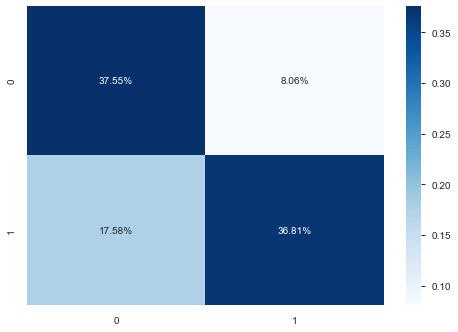

In [71]:
# Predicting performance of Decision Tree

pred_test_dt = dtcv.predict(X_test)


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test_dt)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test,pred_test_dt).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_test, pred_test_dt)))
print()
print(classification_report(y_test, pred_test_dt))